In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("D:/heart failiure/heart_failure_clinical_records_dataset.csv")


In [5]:
# Map binary fields to Yes/No
binary_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']
for col in binary_columns:
    df[col] = df[col].map({0: 'No', 1: 'Yes'})

# Map sex: 1 -> Male, 0 -> Female
df['sex'] = df['sex'].map({1: 'Male', 0: 'Female'})

# Preview the cleaned data
print(df.head())

    age anaemia  creatinine_phosphokinase diabetes  ejection_fraction  \
0  75.0      No                       582       No                 20   
1  55.0      No                      7861       No                 38   
2  65.0      No                       146       No                 20   
3  50.0     Yes                       111       No                 20   
4  65.0     Yes                       160      Yes                 20   

  high_blood_pressure  platelets  serum_creatinine  serum_sodium     sex  \
0                 Yes  265000.00               1.9           130    Male   
1                  No  263358.03               1.1           136    Male   
2                  No  162000.00               1.3           129    Male   
3                  No  210000.00               1.9           137    Male   
4                  No  327000.00               2.7           116  Female   

  smoking  time DEATH_EVENT  
0      No     4         Yes  
1      No     6         Yes  
2     Yes     

In [6]:
df.to_csv("heart_failure_cleaned_labeled.csv", index=False)
print("Cleaned CSV saved as 'heart_failure_cleaned_labeled.csv'")

Cleaned CSV saved as 'heart_failure_cleaned_labeled.csv'


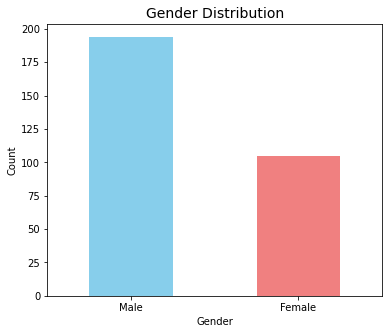

In [8]:
plt.figure(figsize=(6,5))
df['sex'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title("Gender Distribution", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

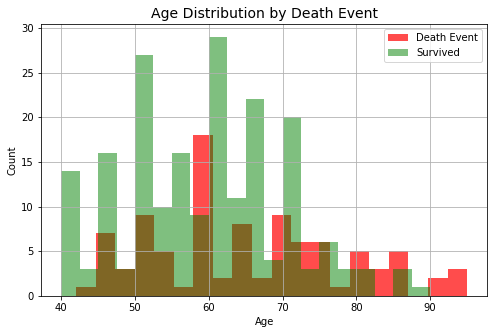

In [9]:
# 2. Death Event by Age
plt.figure(figsize=(8,5))
df[df['DEATH_EVENT']=='Yes']['age'].hist(bins=20, color='red', alpha=0.7, label='Death Event')
df[df['DEATH_EVENT']=='No']['age'].hist(bins=20, color='green', alpha=0.5, label='Survived')
plt.title("Age Distribution by Death Event", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

<Figure size 432x360 with 0 Axes>

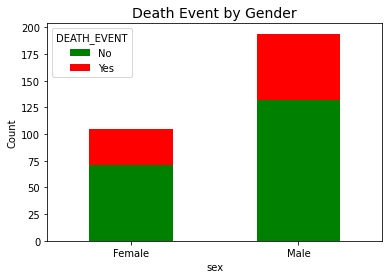

In [10]:
# 3. Death Event by Gender
plt.figure(figsize=(6,5))
df.groupby('sex')['DEATH_EVENT'].value_counts().unstack().plot(kind='bar', stacked=True, color=['green','red'])
plt.title("Death Event by Gender", fontsize=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

<Figure size 432x360 with 0 Axes>

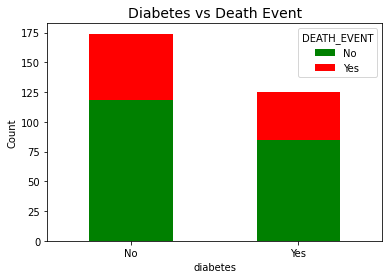

In [11]:
# 4. Diabetes vs Death Event
plt.figure(figsize=(6,5))
df.groupby('diabetes')['DEATH_EVENT'].value_counts().unstack().plot(kind='bar', stacked=True, color=['green','red'])
plt.title("Diabetes vs Death Event", fontsize=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

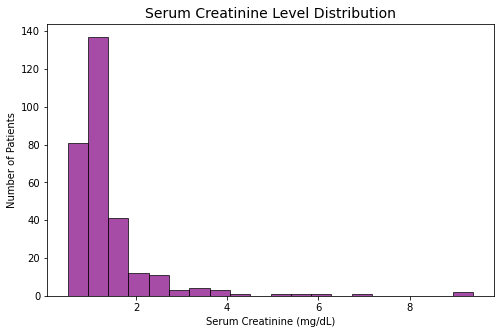

In [12]:

# 5. Serum Creatinine Distribution
plt.figure(figsize=(8,5))
plt.hist(df['serum_creatinine'], bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.title("Serum Creatinine Level Distribution", fontsize=14)
plt.xlabel("Serum Creatinine (mg/dL)")
plt.ylabel("Number of Patients")
plt.show()